# Performance Analysis & Comparison

__Assignment / Goal:__

1. Load __Price Data__ for the Dow Jones Industrial Average Index (DJIA) and all 30 Constituents from "DJI_Const.csv". 

2. Calculate __log returns__ and the mean and std of log returns (price returns)

3. Identify stocks with __highest/lowest returns__ and with __highest/lowest risk__

4. Compare with __Mean-Variance Analysis__ (graph)

5. Characterize the __risk/return profile of the Index__ compared to its constituents. Anything worth mentioning?

6. Repeat the same Analysis with __Total Returns__ (more appropriate!)

__Data Import__

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("DJI_Const.csv", header = [0, 1], index_col = 0, parse_dates=[0])
df.head()

Adj Close                                                  \
                  AAPL        AMGN         AXP          BA         CAT   
Date                                                                     
2020-08-31  127.289726  238.217224   98.721237  171.820007  135.369568   
2020-09-01  132.360016  235.903885   99.576393  172.100006  138.927170   
2020-09-02  129.617706  242.731033  101.451889  174.779999  141.990143   
2020-09-03  119.240417  233.129745  101.510201  168.770004  139.602539   
2020-09-04  119.319313  233.590546  102.686020  171.050003  140.953293   

                                                                     ...  \
                   CRM       CSCO        CVX         DIS        DOW  ...   
Date                                                                 ...   
2020-08-31  272.649994  39.405495  76.447708  131.869995  41.147762  ...   
2020-09-01  281.250000  39.228161  75.673492  133.550003  43.108482  ...   
2020-09-02  276.690002  39.592159  75.773689  135.389999  44.886814  ...   
2020-09-03  265.010010  38.220158  74.944817  133.240005  44.129879  ...   
2020-09-04  254.699997  38.098816  74.626007  131.990005  44.321396  ...   

              Volume                                                          \
                MSFT      NKE       PG      TRV      UNH         V        VZ   
Date                                                                           
2020-08-31  28774200  3519800  5596800  2297900  4341600   9326900  14555500   
2020-09-01  25725500  4912400  5671800   969900  2487100   5642900  13358400   
2020-09-02  34080800  6775400  8384800  1391400  2846500   9863800  21711900   
2020-09-03  58400300  7264400  7277900  1299400  3872500  11310200  23126800   
2020-09-04  59664100  5157600  7437700  1460700  2901000  13243600  22250100   

                                           
                 WBA       WMT       ^DJI  
Date                                       
2020-08-31   7940100  15078800  517320000  
2020-09-01  10728300  35599400  423410000  
2020-09-02   7672400  17222000  539510000  
2020-09-03   8278000  16005000  650080000  
2020-09-04   6994400  11327400  694640000  

[5 rows x 186 columns]

In [36]:
close = df["Close"] # for Price Returns
close.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,129.039993,253.320007,101.589996,171.820007,142.309998,272.649994,42.220001,83.930000,131.869995,45.119999,...,225.529999,111.889999,138.330002,116.040001,312.549988,211.990005,59.270000,38.020000,138.850006,28430.050781
2020-09-01,134.179993,250.860001,102.470001,172.100006,146.050003,281.250000,42.029999,83.080002,133.550003,47.270000,...,227.270004,114.839996,138.179993,114.690002,312.829987,213.350006,59.160000,36.759998,147.589996,28645.660156
2020-09-02,131.399994,258.119995,104.400002,174.779999,149.270004,276.690002,42.419998,83.190002,135.389999,49.220001,...,231.649994,116.800003,140.509995,117.480003,320.239990,216.479996,60.529999,37.169998,147.679993,29100.500000
2020-09-03,120.879997,247.910004,104.459999,168.770004,146.759995,265.010010,40.950001,82.279999,133.240005,48.389999,...,217.300003,112.849998,138.259995,115.349998,316.230011,208.960007,60.610001,37.090000,144.539993,28292.730469
2020-09-04,120.959999,248.399994,105.669998,171.050003,148.179993,254.699997,40.820000,81.930000,131.990005,48.599998,...,214.250000,112.400002,137.960007,116.570000,312.000000,204.660004,60.480000,36.889999,142.830002,28133.310547


In [37]:
close = df["Adj Close"] # for Total Returns
close.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,127.289726,238.217224,98.721237,171.820007,135.369568,272.649994,39.405495,76.447708,131.869995,41.147762,...,221.623245,109.990395,130.940338,110.115639,302.914642,208.799316,53.191097,34.590927,134.576645,28430.050781
2020-09-01,132.360016,235.903885,99.576393,172.100006,138.927170,281.250000,39.228161,75.673492,133.550003,43.108482,...,223.333099,112.890297,130.798340,108.834564,303.185974,210.138840,53.092377,33.444565,143.047653,28645.660156
2020-09-02,129.617706,242.731033,101.451889,174.779999,141.990143,276.690002,39.592159,75.773689,135.389999,44.886814,...,227.637222,114.817032,133.003860,111.482124,310.367523,213.221756,54.321861,33.817589,143.134857,29100.500000
2020-09-03,119.240417,233.129745,101.510201,168.770004,139.602539,265.010010,38.220158,74.944817,133.240005,44.129879,...,213.535797,110.934090,130.874084,109.460876,306.481201,205.814941,54.393661,33.744808,140.091492,28292.730469
2020-09-04,119.319313,233.590546,102.686020,171.050003,140.953293,254.699997,38.098816,74.626007,131.990005,44.321396,...,210.538651,110.491737,130.590103,110.618584,302.381622,201.579651,54.276993,33.562840,138.434143,28133.310547


__Log Returns__

In [38]:
returns = np.log(close / close.shift()).dropna()
returns.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,^DJI
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,0.039060,-0.009759,0.008625,0.001628,0.025941,0.031055,-0.004510,-0.010179,0.012659,0.046550,...,0.007686,0.026023,-0.001085,-0.011702,0.000895,0.006395,-0.001858,-0.033702,0.061044,0.007555
2020-09-02,-0.020936,0.028530,0.018660,0.015452,0.021808,-0.016346,0.009236,0.001323,0.013684,0.040424,...,0.019089,0.016923,0.016721,0.024035,0.023411,0.014564,0.022893,0.011092,0.000609,0.015753
2020-09-03,-0.083448,-0.040359,0.000575,-0.034991,-0.016958,-0.043130,-0.035268,-0.010999,-0.016007,-0.017007,...,-0.063949,-0.034404,-0.016142,-0.018297,-0.012601,-0.035355,0.001321,-0.002154,-0.021492,-0.028150
2020-09-04,0.000661,0.001975,0.011517,0.013419,0.009629,-0.039681,-0.003180,-0.004263,-0.009426,0.004330,...,-0.014135,-0.003995,-0.002172,0.010521,-0.013467,-0.020793,-0.002147,-0.005407,-0.011901,-0.005651
2020-09-08,-0.069666,-0.029497,-0.019108,-0.060055,0.002292,-0.054170,-0.020292,-0.036797,0.016605,-0.013882,...,-0.055614,0.002843,-0.014750,-0.024577,-0.015342,-0.022433,-0.008635,-0.021648,-0.031146,-0.022736


__Mean and Std__

In [39]:
summary = returns.agg(["mean", "std"]).T
summary.head()

,mean,std
AAPL,0.000295,0.020415
AMGN,0.000313,0.014064
AXP,0.000797,0.021891
BA,0.000037,0.027553
CAT,0.000987,0.019311


In [40]:
summary.columns = ["Mean", "Std"]
summary.head()

,Mean,Std
AAPL,0.000295,0.020415
AMGN,0.000313,0.014064
AXP,0.000797,0.021891
BA,0.000037,0.027553
CAT,0.000987,0.019311


__Highest/Lowest Return__

In [41]:
summary.sort_values("Mean", ascending= False, inplace = True)
summary.head()

,Mean,Std
CVX,0.001616,0.019662
GS,0.001199,0.017835
CAT,0.000987,0.019311
UNH,0.000911,0.014442
TRV,0.000877,0.014918


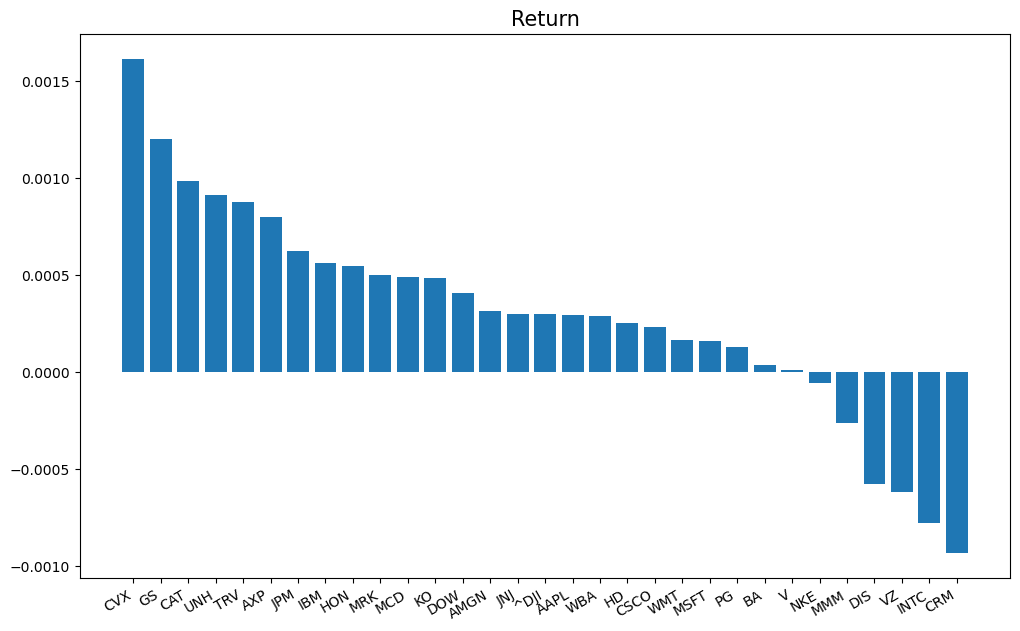

In [42]:
fig = plt.figure(figsize = (12, 8))
plt.bar(summary.index, summary.Mean)
plt.title("Return", fontsize = 15)
fig.autofmt_xdate()
plt.show()

__Highest/Lowest Risk__

In [43]:
summary.sort_values("Std", ascending= True, inplace = True)
summary.head()

,Mean,Std
JNJ,0.000302,0.010512
^DJI,0.000300,0.010607
MCD,0.000488,0.011190
VZ,-0.000618,0.011439
PG,0.000126,0.011619


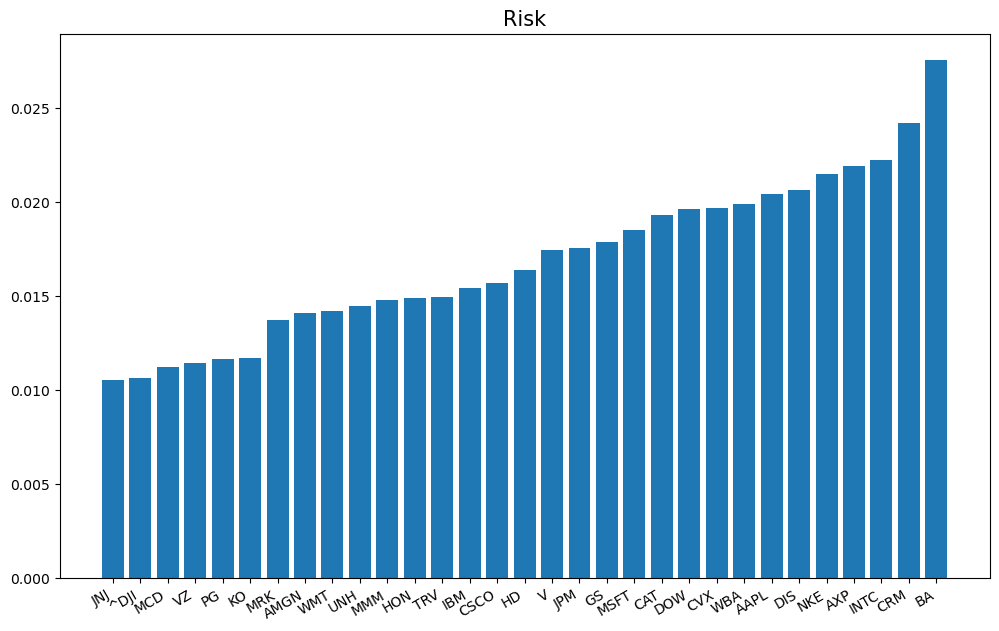

In [44]:
fig = plt.figure(figsize = (12, 8))
plt.bar(summary.index, summary.Std)
plt.title("Risk", fontsize = 15)
fig.autofmt_xdate()
plt.show()

__Mean-Variance Analysis__

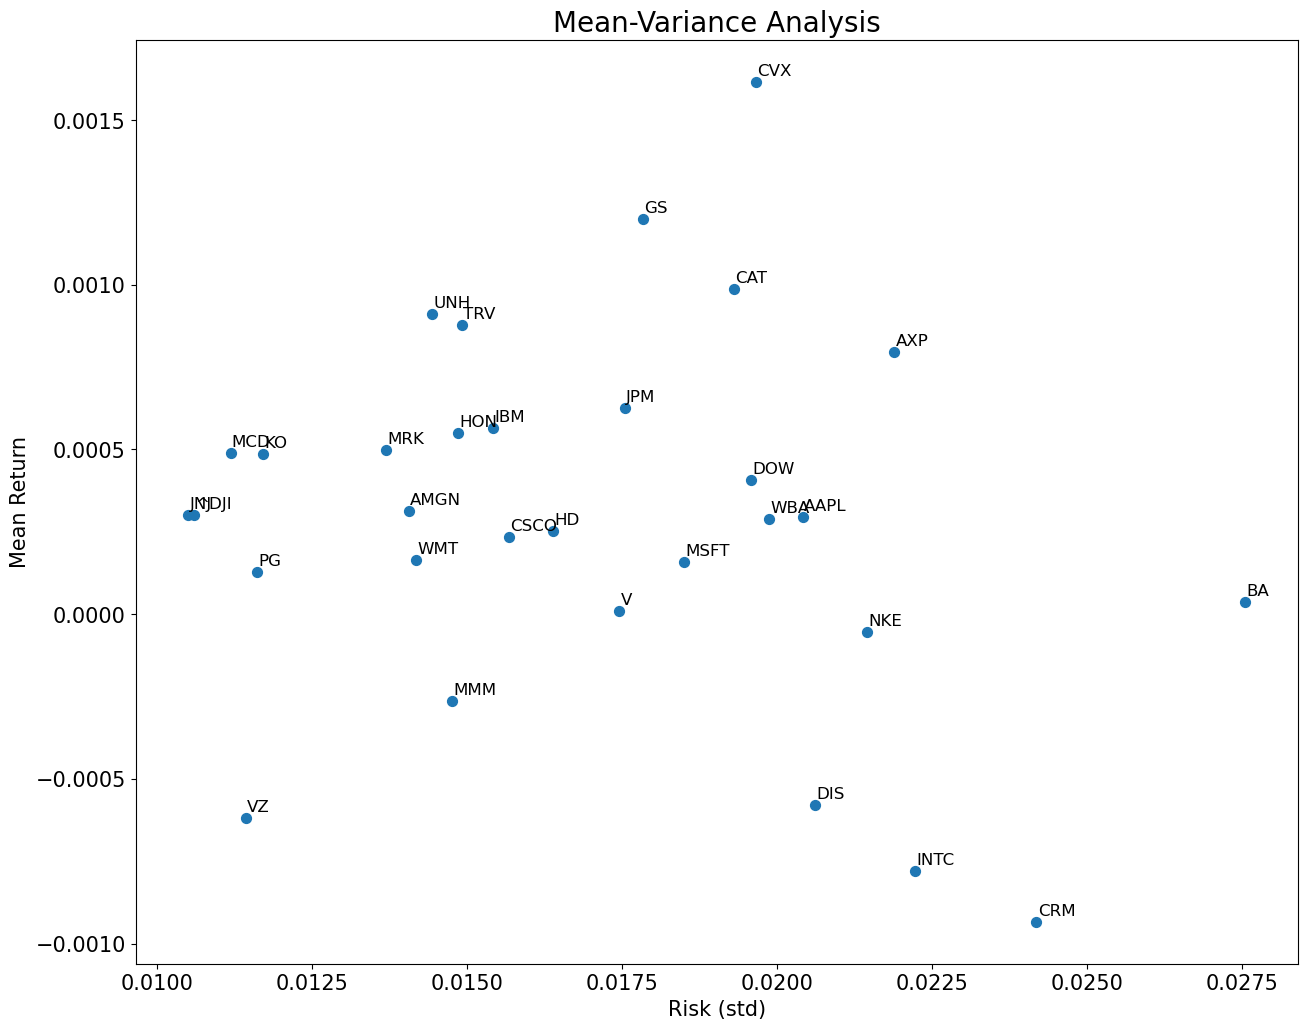

In [45]:
summary.plot(kind = "scatter", x = "Std", y = "Mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Std"]+0.00002, summary.loc[i, "Mean"]+0.00002), size = 12)
plt.xlabel("Risk (std)", fontsize = 15)
plt.ylabel("Mean Return", fontsize = 15)
plt.title("Mean-Variance Analysis", fontsize = 20)
plt.show()

__DJI__:
- Return seems to be (approx.) the weighted average of its constituents
- Risk seems to be much lower than the weighted average of its constituents -> __Diversification Effect!!!__